In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 144 kB 47.1 MB/s 
     |████████████████████████████████| 180 kB 55.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=46096b027f5837ef44b22ed5fc643d873f76deb2c1b9672e4ddac067fa3dfbc6
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb


In [ ]:
import numpy as np
from PIL import Image, ImageDraw 
import PIL
from matplotlib.pyplot import imshow

In [ ]:
import os

In [ ]:
def get_parents(ip_seed):
    np.random.seed(ip_seed)
    rect_shape = list(np.random.randint(10, 900, size =2))
    ellipse_shape = list(np.random.randint(10, 900, size =2))
    theta = list(np.random.randint(0,361, size =2))
    return rect_shape, ellipse_shape, theta 

In [ ]:
def img_with_theta(x,y, theta):
  rect_shape, ellipse_shape, theta = x, y, theta
  img_size = 1000
  img_centre = img_size / 2
  img_theta = PIL.Image.new(mode="RGBA", size=(img_size, img_size), color = "green")
  rect_canvas = PIL.Image.new("RGBA", (1000, 1000), (0, 0, 0, 0))
  ell_canvas = PIL.Image.new("RGBA", (1000,1000), (0, 0, 0, 0))
  draw = ImageDraw.Draw(img_theta)
  draw_rect = ImageDraw.Draw(rect_canvas)
  draw_ell = ImageDraw.Draw(ell_canvas)

  rect_x1 = img_centre-(0.5*(rect_shape[0]))
  rect_y1 = img_centre-(0.5*(rect_shape[1]))

  rect_x2 = img_centre+(0.5*(rect_shape[0]))
  rect_y2 = img_centre+(0.5*(rect_shape[1]))

  ellipse_x1 = img_centre-(0.5*(ellipse_shape[0]))
  ellipse_y1 = img_centre-(0.5*(ellipse_shape[1]))

  ellipse_x2 = img_centre+(0.5*(ellipse_shape[0]))
  ellipse_y2 = img_centre+(0.5*(ellipse_shape[1]))

  draw_rect.rectangle(((rect_x1, rect_y1), (rect_x2, rect_y2)), fill = "black")
  draw_ell.ellipse(((ellipse_x1, ellipse_y1), (ellipse_x2, ellipse_y2)), fill = "white")

  rect_canvas = rect_canvas.rotate(theta[0])
  ell_canvas = ell_canvas.rotate(theta[1])
  
  rect_canvas.alpha_composite(ell_canvas)
  img_theta.alpha_composite(rect_canvas)
  return img_theta

In [ ]:
def cal_loss(img):
    im = img.load()
    black = 0
    white = 0
    for x in range(0,1000):
        for y in range(0,1000):
            if im[x,y]==(0,0,0,255):
                black +=1
            elif im[x,y]==(255,255,255,255):
                white +=1
    try:
      loss = (1-white/black)**2
    except:
      loss = (1-white)**2
    return loss

In [ ]:
def mutate_parents(parent_1, parent_2, number_of_children):
    list_of_mutated_children = [parent_1, parent_2]
    for i in range(0,number_of_children):
        np.random.seed()
        binary_mask_1 = np.random.randint(0,2,size=np.array(parent_1).shape)
        binary_mask_2 = np.logical_not(binary_mask_1)
        new_child = np.add(np.multiply(binary_mask_1,parent_1),np.multiply(binary_mask_2,parent_2))
        new_child = new_child.tolist()
        list_of_mutated_children.append(new_child)
    return list_of_mutated_children

In [ ]:
def top_two(loss_list):
  x = loss_list
  y = np.argsort(x)
  return y[0], y[1]

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Number of iterations completed: 2
Threshold reached
List of loss: [0.6867304878398793, 0.0013421889328426256]
Process completed in iterations:  2
Current loss is: 0.0013421889328426256
Threshold is 0.01
[229, 447] [836, 91] [150, 264]


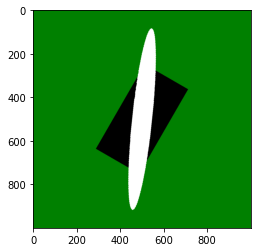

In [ ]:
wandb.init(project="GA with Theta2")
number_of_iterations = 1
#declare 10 parents here and use them to get 10 initial images
parent_list = []
img_list = []
loss_list = []
x = 456
y = 466
threshold = 1.00E-02
for i in range(x,y):
    temp = get_parents(i)
    temp_img = img_with_theta(temp[0],temp[1],temp[2])
    parent_list.append(temp)
    img_list.append(temp_img)
    l = cal_loss(temp_img)
    loss_list.append(l)
a, b = top_two(loss_list)
loss_least = loss_list[a]
wandb.log({"Current Loss":loss_least})
curr_dir = "/content/drive/MyDrive/LENS/GA Images/"+str(x) + str(y)+"/"+str(threshold)+"-threshold"
os.makedirs(curr_dir)
flag=0
loss_least_list = [loss_least]
if loss_least<=threshold:
  imgname = "/content/drive/MyDrive/LENS/GA Images/" +str(x) + str(y)+"/"+str(threshold)+"-threshold/"+str(number_of_iterations)+".png"
  img = img_list[a]
  img.save(imgname)
  flag=1
while(flag==0):
    img_list_new = []
    loss_list_new = []
    parent_list = mutate_parents(parent_list[a], parent_list[b], 100)
    for i in parent_list:
      img_list_new.append(img_with_theta(i[0],i[1],i[2]))
    for i in img_list_new:
      loss_list_new.append(cal_loss(i))
    a, b = top_two(loss_list_new)
    loss_least = loss_list_new[a]
    loss_least_list.append(loss_least)
    wandb.log({"Current Loss":loss_least})
    img = img_with_theta(parent_list[a][0], parent_list[a][1], parent_list[a][2])
    wandb.log({"Image": [wandb.Image(img)]})
    imgname = "/content/drive/MyDrive/LENS/GA Images/" +str(x) + str(y)+"/"+str(threshold)+"-threshold/"+str(number_of_iterations)+".png"
    img.save(imgname)
    number_of_iterations = number_of_iterations+1
    print("Number of iterations completed:",number_of_iterations)
    if loss_least<=threshold:
      flag=1
      print("Threshold reached")
      print("List of loss:",loss_least_list)
      break
    if loss_least==loss_least_list[-2]:
      flag=1
      print("Loss not decreasing, training stopped")
      print("List of loss:",loss_least_list)
      break
print("Process completed in iterations: ",number_of_iterations)
print("Current loss is:",loss_least)
print("Threshold is", threshold)
imshow(img_with_theta(parent_list[a][0], parent_list[a][1], parent_list[a][2]))
imshow(img_with_theta(parent_list[b][0], parent_list[b][1], parent_list[b][2]))
print(parent_list[b][0], parent_list[b][1], parent_list[b][2])